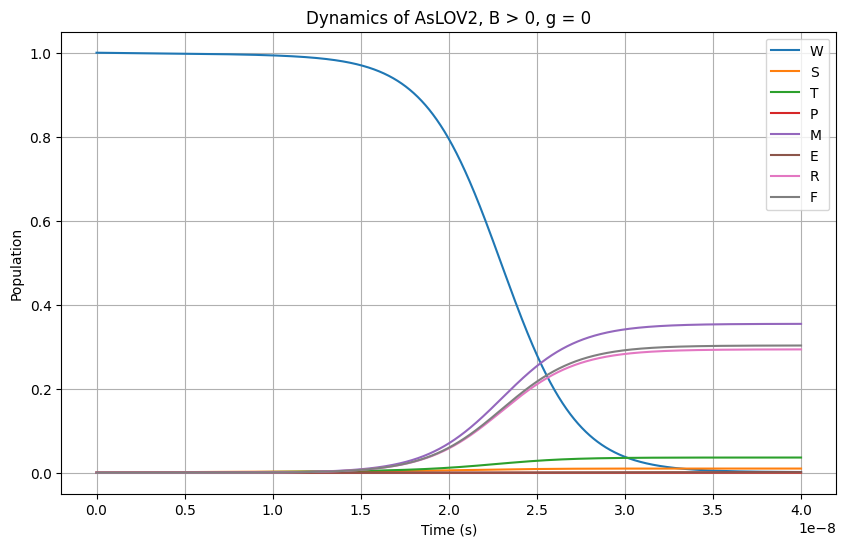

C:\Users\stepo\AppData\Local\Temp\ipykernel_12712\320392253.py:76: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  v_t = cumtrapz(dv_dt, times, initial=0)


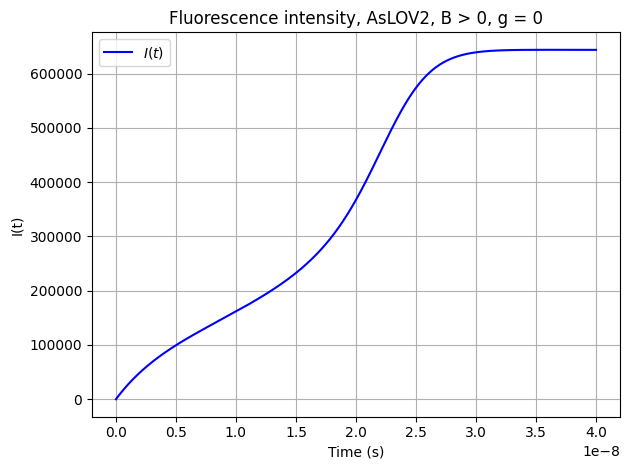

In [36]:
import numpy as np
from scipy.integrate import solve_ivp, cumtrapz
import matplotlib.pyplot as plt

# Параметры (настраиваемые)
f = 2000000  # Частота (примерное значение, можно менять)
g = 0 #1000000 # g-фактор
B = 2.0e-2  # Магнитное поле (примерное значение)

# Матрица коэффициентов
A = np.array([
    [-0.23 * f, 6.5e7, 0, 0, 0, 0, 0, 0],
    [0.23 * f, -1.2e9, 1.3e8, 1.7e11, 0, 0, 0, 0],
    [0, 1.3e8, -1e7, 0, 4.5e7, 0, 0, 0],
    [0, 1e9, 0, -1.71e11, 320, 0, 0, 6.6e6],
    [0, 0, 1e7, 1e9, -7e8-1e3 * g / (2 * B), 1e3 * g / (2 * B), 7*B*1e10, 6.6e6],
    [0, 0, 0, 0, 1e3 * g / (2 * B), -7*B*1e10 + 2.3e8, 0, 6.6e6 * np.exp(-2 * B * 1e-23)],
    [0, 0, 0, 0, 7*B*1e10, 0, -1.23e9, 6.6e6 * np.exp(2 * B * 1e-23)],
    [0, 0, 0, 2.3e8, 2.3e8, 2.3e8 * np.exp(2 * B * 1e-23), 2.3e8 * np.exp(-2 * B * 1e-23), -26.4e6],
])

# Начальные условия (пример: все нули, кроме первого состояния)
y0 = np.zeros(8)
y0[0] = 1.0  # Например, W находится в начальном состоянии

# Диапазон времени
t_span = (0, 0.4e-7)  # От 0 до 10 наносекунд
t_eval = np.linspace(*t_span, 10000)  # 1000 точек для отрисовки

# Уравнение системы с нормализацией
def system_with_normalization(t, y):
    dydt = A @ y
    return dydt

# Коллбэк для нормализации
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Пользовательская функция для интеграции с нормализацией
def solve_with_normalization(system, t_span, y0, t_eval):
    result = []
    times = []
    current_y = y0
    times.append(t_span[0])
    result.append(current_y)

    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(system, (times[-1], t_eval[i]), current_y, method='RK45')
        current_y = sol.y[:, -1]
        current_y = normalize(current_y)
        times.append(t_eval[i])
        result.append(current_y)

    return np.array(times), np.array(result).T

# Решение системы
times, normalized_y = solve_with_normalization(system_with_normalization, t_span, y0, t_eval)
labels = ['W', 'S', 'T', 'P', 'M', 'E', 'R', 'F']
# График
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.plot(times, normalized_y[i], label=labels[i])
plt.xlabel('Time (s)')
plt.ylabel('Population')
plt.title('Dynamics of AsLOV2, B > 0, g = 0')
plt.legend()
plt.grid()
plt.show()


dv_dt = 6.5e7 * normalized_y[1]
v_t = cumtrapz(dv_dt, times, initial=0)

plt.plot(times, dv_dt, label=r'$I(t)$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Fluorescence intensity, AsLOV2, B > 0, g = 0')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

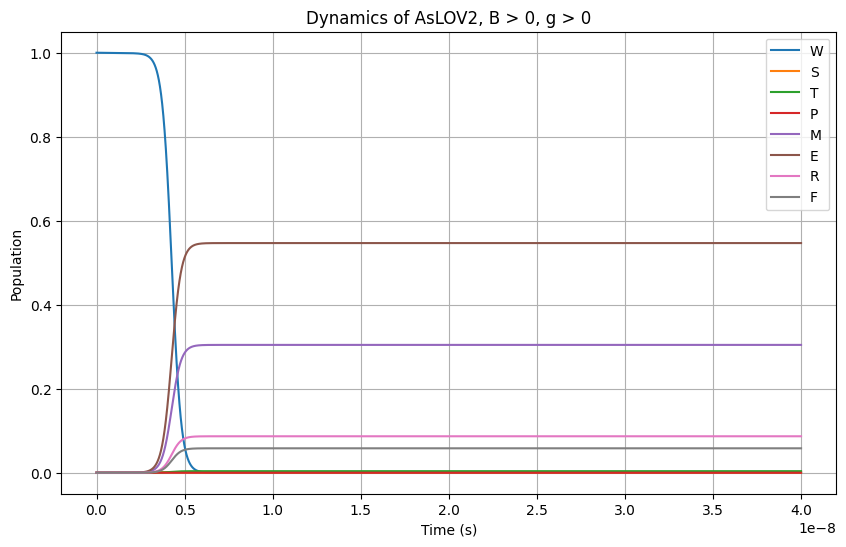

C:\Users\stepo\AppData\Local\Temp\ipykernel_22760\3256846133.py:76: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  v_t = cumtrapz(dv_dt, times, initial=0)


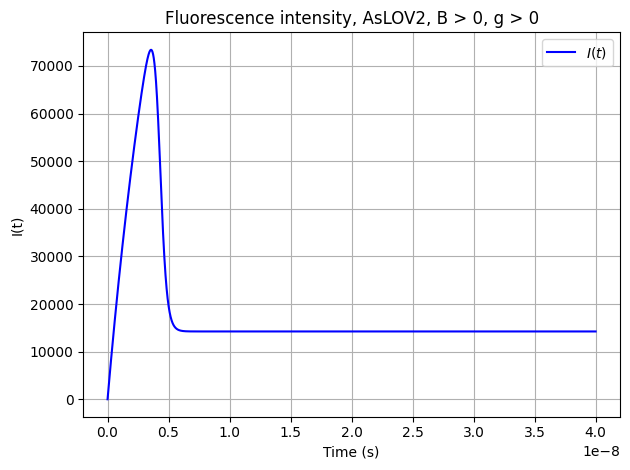

In [5]:
import numpy as np
from scipy.integrate import solve_ivp, cumtrapz
import matplotlib.pyplot as plt

# Параметры (настраиваемые)
f = 2000000 # Частота (примерное значение, можно менять)
g = 200000 # g-фактор
B = 2.0e-2  # Магнитное поле (примерное значение)

# Матрица коэффициентов
A = np.array([
    [-0.23 * f, 6.5e7, 0, 0, 0, 0, 0, 0],
    [0.23 * f, -1.2e9, 1.3e8, 1.7e11, 0, 0, 0, 0],
    [0, 1.3e8, -1e7, 0, 4.5e7, 0, 0, 0],
    [0, 1e9, 0, -1.71e11, 320, 0, 0, 6.6e6],
    [0, 0, 1e7, 1e9, -7e8-1e3 * g / (2 * B), 1e3 * g / (2 * B), 7*B*1e10, 6.6e6],
    [0, 0, 0, 0, 1e3 * g / (2 * B), -7*B*1e10 + 2.3e9, 0, 6.6e6 * np.exp(-2 * B * 1e-23)],
    [0, 0, 0, 0, 7*B*1e10, 0, -1.23e9, 6.6e6 * np.exp(2 * B * 1e-23)],
    [0, 0, 0, 2.3e8, 2.3e8, 2.3e8 * np.exp(2 * B * 1e-23), 2.3e8 * np.exp(-2 * B * 1e-23), -26.4e6],
])

# Начальные условия (пример: все нули, кроме первого состояния)
y0 = np.zeros(8)
y0[0] = 1.0  # Например, W находится в начальном состоянии

# Диапазон времени
t_span = (0, 0.4e-7)  # От 0 до 10 наносекунд
t_eval = np.linspace(*t_span, 10000)  # 1000 точек для отрисовки

# Уравнение системы с нормализацией
def system_with_normalization(t, y):
    dydt = A @ y
    return dydt

# Коллбэк для нормализации
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Пользовательская функция для интеграции с нормализацией
def solve_with_normalization(system, t_span, y0, t_eval):
    result = []
    times = []
    current_y = y0
    times.append(t_span[0])
    result.append(current_y)

    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(system, (times[-1], t_eval[i]), current_y, method='RK45')
        current_y = sol.y[:, -1]
        current_y = normalize(current_y)
        times.append(t_eval[i])
        result.append(current_y)

    return np.array(times), np.array(result).T

# Решение системы
times, normalized_y = solve_with_normalization(system_with_normalization, t_span, y0, t_eval)
labels = ['W', 'S', 'T', 'P', 'M', 'E', 'R', 'F']
# График
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.plot(times, normalized_y[i], label=labels[i])
plt.xlabel('Time (s)')
plt.ylabel('Population')
plt.title('Dynamics of AsLOV2, B > 0, g > 0')
plt.legend()
plt.grid()
plt.show()


dv_dt = 6.5e7 * normalized_y[1]
v_t = cumtrapz(dv_dt, times, initial=0)

plt.plot(times, dv_dt, label=r'$I(t)$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('Fluorescence intensity, AsLOV2, B > 0, g > 0')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from scipy.integrate import solve_ivp, cumtrapz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Параметры (константы)
f = 2e6  # Частота

# Определяем матрицу коэффициентов
def get_matrix(g, B):
    return np.array([
        [-0.23 * f, 6.5e7, 0, 0, 0, 0, 0, 0],
        [0.23 * f, -1.2e9, 1.3e8, 1.7e11, 0, 0, 0, 0],
        [0, 1.3e8, -1e7, 0, 4.5e7, 0, 0, 0],
        [0, 1e9, 0, -1.71e11, 320, 0, 0, 6.6e6],
        [0, 0, 1e7, 1e9, -7e8 - 1e3 * g / (2 * B), 1e3 * g / (2 * B), 7 * B * 1e10, 6.6e6],
        [0, 0, 0, 0, 1e3 * g / (2 * B), -7 * B * 1e10 + 2.3e9, 0, 6.6e6 * np.exp(-2 * B * 1e-23)],
        [0, 0, 0, 0, 7 * B * 1e10, 0, -1.23e9, 6.6e6 * np.exp(2 * B * 1e-23)],
        [0, 0, 0, 2.3e8, 2.3e8, 2.3e8 * np.exp(2 * B * 1e-23), 2.3e8 * np.exp(-2 * B * 1e-23), -26.4e6],
    ])

# Начальные условия
y0 = np.zeros(8)
y0[0] = 1.0

# Диапазон времени
t_span = (0, 0.4e-7)
t_eval = np.linspace(*t_span, 1000)

# Нормализация
def normalize(y):
    total = np.sum(y)
    if total > 0:
        return y / total
    return y

# Решение с нормализацией
def solve_with_normalization(A, y0, t_eval):
    result = []
    current_y = y0
    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(lambda t, y: A @ y, (t_eval[i-1], t_eval[i]), current_y, method='Radau')
        current_y = normalize(sol.y[:, -1])
        result.append(current_y)

    return np.array(result).T

# Функция вычисления интенсивности
def compute_fluorescence_intensity(g, B):
    if B == 0:  # Избегаем деления на ноль
        B = 1e-10
    A = get_matrix(g, B)
    normalized_y = solve_with_normalization(A, y0, t_eval)
    dv_dt = 6.5e7 * normalized_y[1]
    return dv_dt[-1]  # Возвращаем интенсивность в конце



100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [7:21:34<00:00, 264.95s/it]


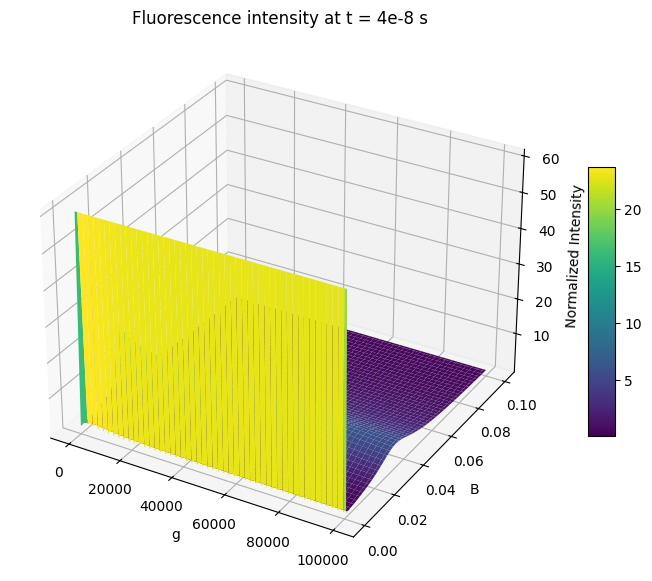

In [26]:
# Создаем сетку значений g и B
g_values = np.linspace(0, 1e5, 100)
B_values = np.linspace(0, 1e-1, 100)
g_grid, B_grid = np.meshgrid(g_values, B_values)

# Вычисляем интенсивности
intensity = np.zeros_like(g_grid)
for i in tqdm(range(g_grid.shape[0])):
    for j in range(g_grid.shape[1]):
        intensity[i, j] = compute_fluorescence_intensity(g_grid[i, j], B_grid[i, j])

# Нормируем по значению в (0, 0)
intensity /= intensity[0, 0]

# Построение 3D-графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(g_grid, B_grid, intensity, cmap='viridis', edgecolor='none')
ax.set_title('Fluorescence intensity at t = 4e-8 s')
ax.set_xlabel('g')
ax.set_ylabel('B')
ax.set_zlabel('Normalized Intensity')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.savefig("fluorescence_intensity_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Проверьте, содержатся ли данные в переменной intensity
print(intensity.shape)
np.savetxt("intensity_data.txt", intensity)


(100, 100)


AttributeError: module 'numpy' has no attribute 'DataFrame'

In [20]:
condition_number = np.linalg.cond(A)
print(f"Condition number: {condition_number:.2e}")
import time
start_time = time.time()
def solve_with_normalization(A, y0, t_eval):
    result = []
    current_y = y0
    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        sol = solve_ivp(lambda t, y: A @ y, (t_eval[i-1], t_eval[i]), current_y, method='RK45')
        current_y = normalize(sol.y[:, -1])
        result.append(current_y)

    return np.array(result).T



t_span = (0, 0.4e-7)
t_eval2 = np.linspace(*t_span, 10) 
normalized_y = solve_with_normalization(A, y0, t_eval2)
dv_dt = 6.5e7 * normalized_y[1]
print(f"Time for one point: {time.time() - start_time:.2f} seconds")

Condition number: 5.79e+05
Time for one point: 0.36 seconds


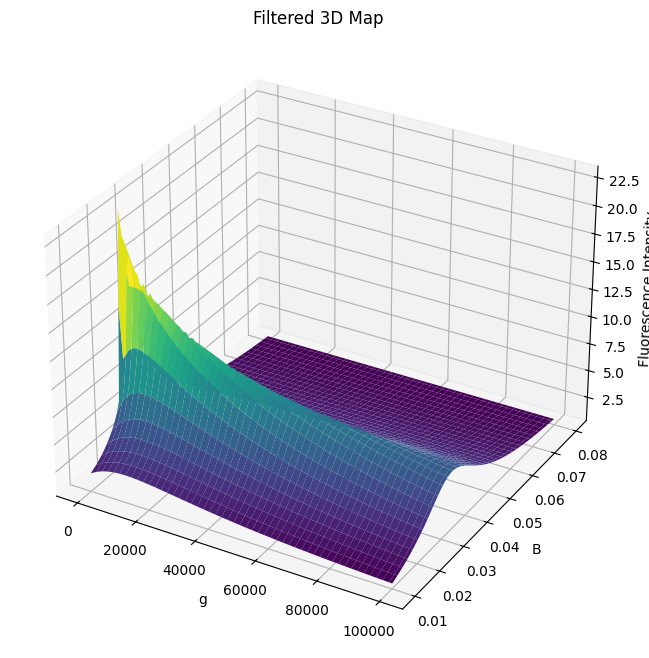

In [18]:
intensity = np.loadtxt("intensity_data.txt")
B_grid = np.linspace(0, 0.1, intensity.shape[0])  # Пример генерации B (если сохранили отдельно, загрузите)
mask = (B_grid >= 0.01) & (B_grid <= 0.08)
filtered_intensity = intensity[mask, :]  # Применяем маску
filtered_B_grid = B_grid[mask]  # Оставляем только соответствующие B
g_grid = np.linspace(0, 1e5, intensity.shape[1])







g_grid = np.linspace(0, 1e5, intensity.shape[1])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение графика из отфильтрованных данных
G, B = np.meshgrid(g_grid, filtered_B_grid)
ax.plot_surface(G, B, filtered_intensity, cmap='viridis')

# Настройка осей
ax.set_xlabel('g')
ax.set_ylabel('B')
ax.set_zlabel('Fluorescence Intensity')
plt.title("Filtered 3D Map")
plt.show()


In [24]:
def compute_intensity(g, B):
    if B == 0:  # Избегаем деления на ноль
        B = 1e-10
    A = get_matrix(g, B)
    normalized_y = solve_with_normalization(A, y0, t_eval)
    dv_dt = 6.5e7 * normalized_y[1]
    return dv_dt # Возвращаем интенсивность в конце

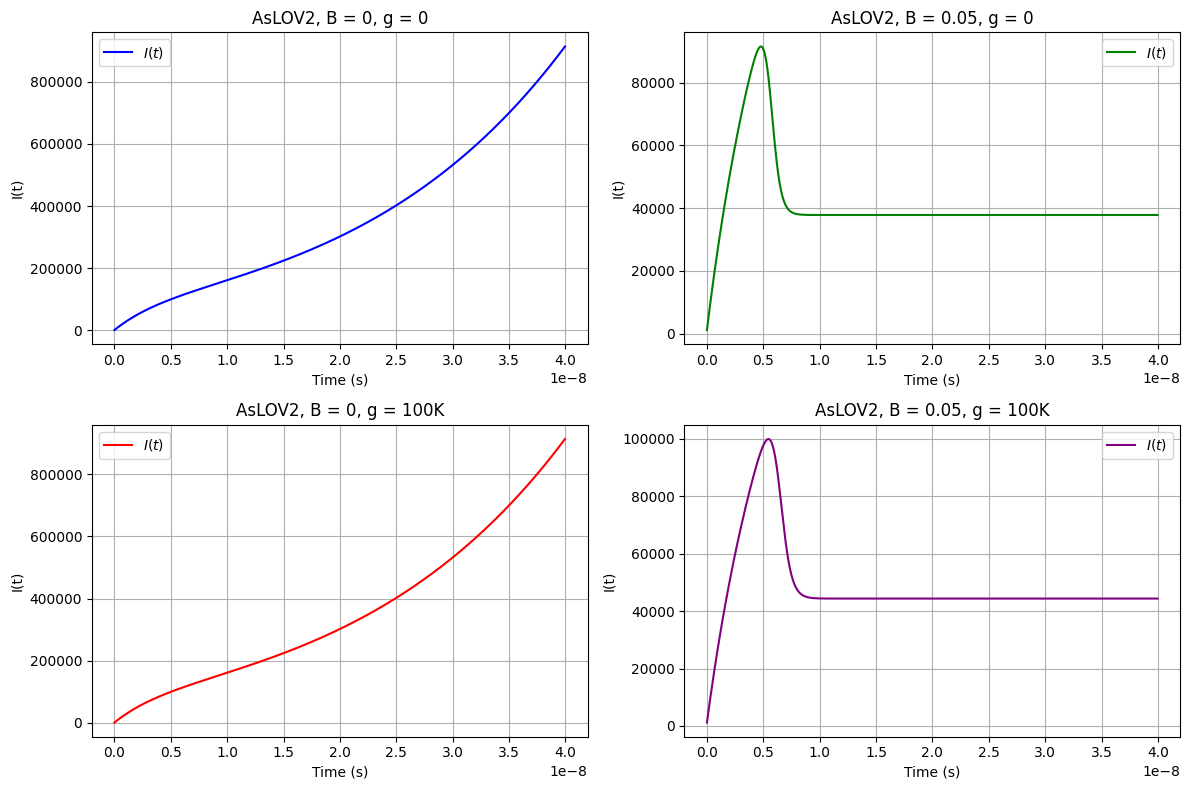

In [25]:
t_span = (0, 0.4e-7)
t_eval = np.linspace(*t_span, 1000)
dv_dt00 = compute_intensity(1, 0)
dv_dt005 = compute_intensity(0, 0.05)
dv_dt_60K0 = compute_intensity(100000, 0)
dv_dt_both = compute_intensity(100000, 0.05)
times = t_eval[:999]

plt.figure(figsize=(12, 8))

# Первый график
plt.subplot(2, 2, 1)
plt.plot(times, dv_dt00, label=r'$I(t)$', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0, g = 0')
plt.grid()
plt.legend()

# Второй график
plt.subplot(2, 2, 2)
plt.plot(times, dv_dt005, label=r'$I(t)$', color='green')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0.05, g = 0')
plt.grid()
plt.legend()

# Третий график
plt.subplot(2, 2, 3)
plt.plot(times, dv_dt_60K0, label=r'$I(t)$', color='red')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0, g = 100K')
plt.grid()
plt.legend()

# Четвёртый график
plt.subplot(2, 2, 4)
plt.plot(times, dv_dt_both, label=r'$I(t)$', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('I(t)')
plt.title('AsLOV2, B = 0.05, g = 100K')
plt.grid()
plt.legend()

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()


In [27]:
(dv_dt_both[-1]-dv_dt005[-1])/dv_dt005[-1] *100

17.308509988327753